In [1]:
import numpy as np
import scipy as sp
from scipy import special
import matplotlib.pyplot as plt

from numpy import arange
from scipy.integrate import odeint
from scipy import optimize
from scipy import misc

In [117]:
# parameters
m = 100                               #GeV DM Mass
Mp = 1.22e19                            #GeV Planck Mass

In [3]:
from scipy import integrate

# The function "integrate.odeint" Integrate a system of ordinary differential equations.

#DESCRIPTION
# scipy.integrate.odeint(func, y0, t, args=(), Dfun=None, col_deriv=0, full_output=0, ml=None, mu=None, 
# rtol=None, atol=None, tcrit=None, h0=0.0, hmax=0.0, hmin=0.0, ixpr=0, mxstep=0, mxhnil=0, mxordn=12, 
# mxords=5, printmessg=0, tfirst=False)

# func : callable(y, t, …) or callable(t, y, …)
# Computes the derivative of y at t. If the signature is callable(t, y, ...), 
# then the argument tfirst must be set True.

# y0 : array
# Initial condition on y (can be a vector).

# t :array
# A sequence of time points for which to solve for y. The initial value point should be the first element of this
#sequence. This sequence must be monotonically increasing or monotonically decreasing; repeated values are allowed.

#************
# So basically the first parameter is the function to integrate, dY/dx in our case, the second argument is 
# the starting point, and the third is the variable you want to integrate into.
#************

In [4]:
def Yeq(x):
    return 0.145*x**(3/2)*np.exp(-x)

In [5]:
global k
k=1
fk=lambda sigmav: np.sqrt(np.pi*(Mp**2)/45)*m*sigmav  #starting to build the dY/dx

def BEx(x,m=100):
    #T=m/x
    return k/x**2   #missing piece of the formula g_good(T).

In [6]:
def BE(Y,x):
    return -(Y**2-Yeq(x)**2)*BEx(x)   #putting together the things to have the right formula

#THESE FUNCTIONS HAVE BEEN CREATED TO ACHIVE THE COMPLETE FORMULA FOR THE dY/dx

In [94]:
def BE1(poi,x):
    Y2, Y1=poi
    return [-(Y1*Y2-Yeq(x)**2)*BEx(x)-BEx(x)*(Y1**2-Yeq(x)**2)*1E-3, -(Y1*Y2-Yeq(x)**2)*BEx(x)-BEx(x)*(Y2**2-Yeq(x)**2)*1E-10 ] 

#There should be Yeq1 e Yeq2 but I don't know how to express them
#also the cross sections need to be different one from the other in principle..

No handles with labels found to put in legend.


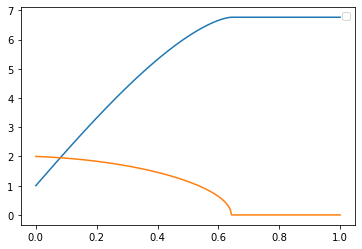

In [24]:
#USEFUL EXAMPLE

def func(z,t):
    o, q=z
    #print (t,z)
    return [6*q, (2*t-3*o)*q/(4*q**2+1e-12)]    

z0=[1,2]
t = np.linspace(0,1,501)
xx=odeint(func, z0, t)
plt.figure(1)
plt.plot(t, xx[:,0],t,xx[:,1])
plt.legend()
plt.show()

$$ \frac{dY_{1,2}}{dx} = - \frac{\lambda_A^{-12}}{x^2} \Big[ Y_1 Y_2 - Y_1^{(0)}Y_2^{(0)} \Big] -\frac{\lambda_A^{11,22}}{x^2} \Big[ Y_{1,2}^2 -(Y_{1,2}^0)^2 \Big] +[...] $$ Plus other therms, but now let's keep it easy

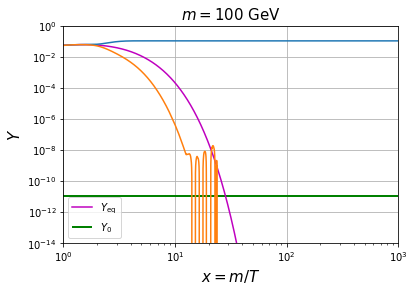

In [101]:
xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Yeq(xx),'m',label=r'$Y_{\rm eq}$')


k=fk(sigmav=1E-15)
x=np.logspace(np.log10(1),np.log10(1000),10000)
z0=[Yeq(x[0]), Yeq(x[0])]

Y=integrate.odeint(BE1, z0, x)
#plt.loglog(x,Y,'k:')

plt.plot(x, Y[:,0],x,Y[:,1])


plt.hlines(1E-11,1,1000,linestyles='-',color='g',lw=2,label='$Y_0$')    #THAT'S THE HORIZONTAL LINE IN PURPLE. 
                                                                #REFERS TO THE RIGHT EXPERIMENTAL ABOUNDANCE


plt.ylim(1E-14,1)
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$m = 100$ GeV', size= 15)
plt.legend()
plt.grid()

#Okay, this program is actually solving a system of two differential equations, but I gave him the same two, so
#they are actually one over the other.

$$\frac{dY_{tot}}{dx}= - \Big[ \frac{Y_{tot}^2}{(Y_1^{(0)}+ Y_2^{(0)})^2}-1 \Big] \sum_{i,j} \frac{\lambda_A^{ij}}{x^2}Y_i^{(0)}Y_j^{(0)}$$

In [126]:
def BEE(Y,x):
    return -((Y**2/(Yeq(x)+Yeq(x))**2)-1)*(BEx(x)* (Yeq(x)**2)+BEx(x)* (Yeq(x)**2)*0.004)

#Here you need to insert all the possible interactions and cross sections terms of the theory

/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_7595/3762651026.py:2: RuntimeWarning: divide by zero encountered in divide
  return -((Y**2/(Yeq(x)+Yeq(x))**2)-1)* (BEx(x)* (Yeq(x)**2)+BEx(x)* (Yeq(x)**2)*0.004)
/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_7595/3762651026.py:2: RuntimeWarning: invalid value encountered in multiply
  return -((Y**2/(Yeq(x)+Yeq(x))**2)-1)* (BEx(x)* (Yeq(x)**2)+BEx(x)* (Yeq(x)**2)*0.004)
/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_7595/3762651026.py:2: RuntimeWarning: divide by zero encountered in divide
  return -((Y**2/(Yeq(x)+Yeq(x))**2)-1)* (BEx(x)* (Yeq(x)**2)+BEx(x)* (Yeq(x)**2)*0.004)
/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_7595/3762651026.py:2: RuntimeWarning: invalid value encountered in multiply
  return -((Y**2/(Yeq(x)+Yeq(x))**2)-1)* (BEx(x)* (Yeq(x)**2)+BEx(x)* (Yeq(x)**2)*0.004)
/var/folders/w2/vjpbmwkj10s_w78j4p9hxlyh0000gn/T/ipykernel_7595/3762651026.py:2: RuntimeWarning: divide by

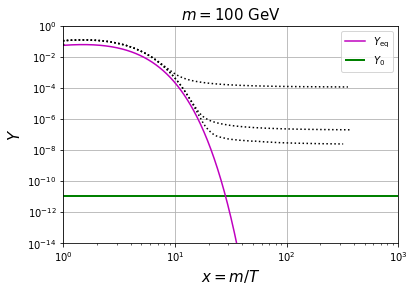

In [130]:
xx=np.logspace(np.log10(1),np.log10(1000),1000)
plt.loglog(xx,Yeq(xx),'m',label=r'$Y_{\rm eq}$')



k=fk(sigmav=1E-12)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BEE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-15)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BEE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')

k=fk(sigmav=1E-11)
x=np.logspace(np.log10(1),np.log10(1000),10000)
Y=integrate.odeint(BEE,Yeq(x[0]),x)
plt.loglog(x,Y,'k:')


plt.hlines(1E-11,1,1000,linestyles='-',color='g',lw=2,label='$Y_0$')    #THAT'S THE HORIZONTAL LINE IN PURPLE. 
                                                                #REFERS TO THE RIGHT EXPERIMENTAL ABOUNDANCE


plt.ylim(1E-14,1)
plt.xlim(1,1000)
plt.xlabel('$x = m/T$', size= 15)
plt.ylabel('$Y$', size= 15)
plt.title('$m = 100$ GeV', size= 15)
plt.legend()
plt.grid()

# x grows in time means that the temperature decrease

In [119]:
x


array([   1.        ,    1.00069108,    1.00138264, ...,  998.61926487,
        999.30939397, 1000.        ])